## Discriminative Models
* Logistic Regression
* Perceptron
* SVM

reference
* http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Load wine dataset and remove class 3 samples, leave only 2 classes
data = pd.read_csv('../data/wine_original.csv')
data = data[data['class'] != 3]
labels = data['class']
del data['class']
data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

parameters = { 'penalty': ['l1','l2'], 
              'C':[0.1, 0.5, 1, 2, 3, 4, 5, 10]}
logreg = LogisticRegression()
clf = GridSearchCV(logreg, parameters, verbose=True, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
train_acc = accuracy_score(clf.predict(X_train), y_train)
print ('Selected Parameters: ', clf.best_params_)
print ('Training Accuracy = ' + str(train_acc))
print ('Test Accuracy = ' + str(accuracy))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Selected Parameters:  {'C': 1, 'penalty': 'l2'}
Training Accuracy = 0.990384615385
Test Accuracy = 0.961538461538


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    3.3s finished


In [3]:
def plot_boundary(ax, estimator, title, xfeature, yfeature, X_train, X_test):
    from matplotlib.colors import ListedColormap
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X_train[xfeature].min() - 1, X_train[xfeature].max() + 1
    y_min, y_max = X_train[yfeature].min() - 1, X_train[yfeature].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .008),
                        np.arange(y_min, y_max, .008))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    ax.scatter(X_train[xfeature], X_train[yfeature], c=y_train, cmap=cmap_bold)
    ax.scatter(X_test[xfeature], X_test[yfeature], c=y_test, marker='x', cmap=cmap_bold)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(xfeature, fontsize=10)
    ax.set_ylabel(yfeature, fontsize=10)
    ax.set_title(title, fontsize=10)

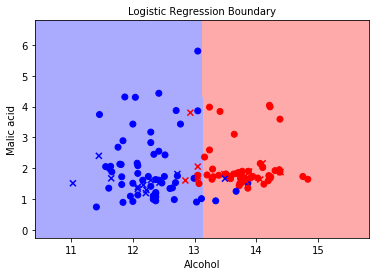

array([[-2.64492435, -0.00547173]])

In [4]:
# With pretty large C, we want the model fitting the data most.
# This falls back to pure Logistic Regression without regulation.
clf = LogisticRegression(C=1000, penalty='l1')
clf.fit(X_train[['Alcohol', 'Malic acid']], y_train)
fig, ax = plt.subplots(1, 1)
plot_boundary(ax, clf, 'Logistic Regression Boundary', 'Alcohol', 'Malic acid', X_train, X_test)
plt.show()
clf.coef_

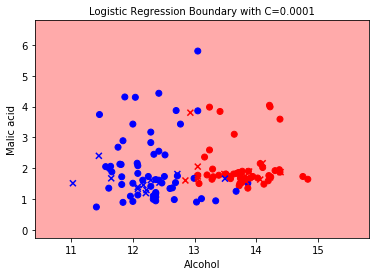

array([[ 0.,  0.]])

In [5]:
# With pretty small C = 0.0001, loss logistic function makes little any impact, all samples look similar.
# This ends up no boundary found and final w is zero vector.
clf = LogisticRegression(C=0.0001, penalty='l1')
clf.fit(X_train[['Alcohol', 'Malic acid']], y_train)

fig, ax = plt.subplots(1, 1)
plot_boundary(ax, clf, 'Logistic Regression Boundary with C=0.0001', 'Alcohol', 'Malic acid', X_train, X_test)
plt.show()
clf.coef_

In [6]:
# No penalty: with a super large C, error with logistic function overwhelm the penalty, no regulation used
# so this turns a truely logistic regression
clf = LogisticRegression(penalty='l1', C=100000000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)))

#original weights
orig_weights = clf.coef_
print ('original weights: ')
print (orig_weights)

Test accuracy = 0.961538461538
original weights: 
[[ -0.23238994  -4.05847771  -7.47528611   1.5168215   -0.03855916
    3.7776159   -2.43751536  15.62477182   3.08479208  -3.87384382
   12.95322114  -3.02583806  -0.03860874]]


In [7]:
# Compare weight vector 'coef' produced by penalty l1 and l2
# l1 gives a sparse weight vector
for (p,title) in [('l1', 'lasso'), ('l2', 'lasso')]:
    clf = LogisticRegression(penalty=p, C=0.5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print ('Test accuracy for penalty:{} = {}'.format(p, accuracy_score(y_pred, y_test)))
    print ('lasso weights: {}'.format(title))
    print (clf.coef_)

Test accuracy for penalty:l1 = 0.9230769230769231
lasso weights: lasso
[[ 0.         -0.84067497  0.          0.55653587  0.06971872  0.          0.
   0.          0.         -0.28778715  0.          0.         -0.01873592]]
Test accuracy for penalty:l2 = 0.9615384615384616
lasso weights: lasso
[[  2.36793910e-01  -9.02533913e-01  -3.08314554e-01   5.71540240e-01
    6.02322999e-02   8.58793512e-02  -3.25707475e-01   7.43099786e-04
    3.27724143e-02  -5.31718787e-01   1.80178784e-01  -1.99694524e-01
   -1.84647961e-02]]


In [8]:
# Regularization l2, varying C: from very Low C to good C
for C in [.000000001, 0.0001, 1]:
    clf = LogisticRegression(penalty='l2', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print ('Test accuracy for penalty:l2, C:{} = {}'.format(C, accuracy_score(y_pred, y_test)))
    print (clf.coef_)

Test accuracy for penalty:l2, C:1e-09 = 0.5
[[  4.26118099e-08   1.23471152e-08   9.26941193e-09   1.96887864e-07
    3.24211434e-07   7.68898144e-10  -7.67648039e-09   3.95535063e-09
    4.36390111e-09  -3.71078553e-08   6.11976672e-09   8.76110388e-09
   -1.07918296e-05]]
Test accuracy for penalty:l2, C:0.0001 = 0.7692307692307693
[[  6.02729762e-03   6.77212617e-04   1.08793671e-03   1.43562281e-02
    3.89448399e-02   8.55685989e-04   4.15047862e-04   2.77685186e-04
    7.00048232e-04   8.47082886e-05   6.57318366e-04   1.18797209e-03
   -5.57986283e-03]]
Test accuracy for penalty:l2, C:1 = 0.9615384615384616
[[ 0.36419119 -1.16231035 -0.56989121  0.62460879  0.05731718  0.15926463
  -0.43103006 -0.01097917  0.15063666 -0.70851082  0.27176725 -0.29676629
  -0.01922753]]


C:\Users\wenyan\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


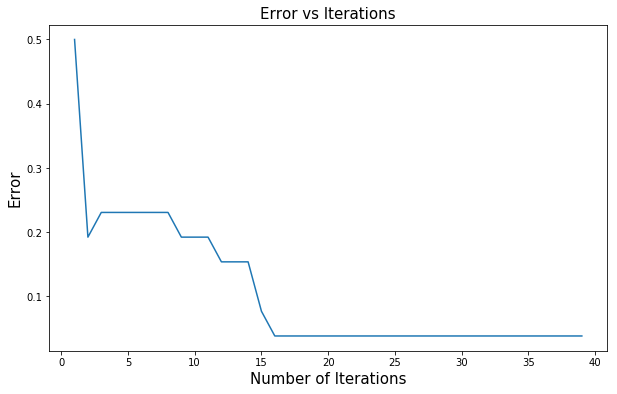

In [9]:
# Effect of number of iterations on accuracy
result=[]
for iter_cnt in range(1, 40):
    clf = LogisticRegression(penalty='l2', solver= 'newton-cg', max_iter=iter_cnt)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    result.append(1-np.sum(y_pred == y_test)/len(y_test))

# Plot
plt.figure(figsize=(10,6))
plt.title('Error vs Iterations', fontsize=15)
plt.xlabel('Number of Iterations', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.plot(range(1, 40), result)
plt.show()

weight vector for eta:1e-10
 [[  1.76872597e-07   4.97321338e-08   3.80656128e-08   7.82435143e-07
    1.34735830e-06   5.13001584e-09  -2.77906526e-08   1.56829579e-08
    1.84755003e-08  -1.40883757e-07   2.47246042e-08   3.65642238e-08
   -4.13219750e-05]]
weight vector for eta:0.01
 [[  18.039544      1.2332193     3.24239914   45.69909329  114.19219978
     2.45002749    0.76441001    0.88880591    2.04490089   -0.94186007
     2.10015376    3.50879068  -23.1637711 ]]
weight vector for eta:10
 [[  1870.53386989    301.37775426    348.52527706   4193.80013696
   15267.1375148     284.22823766    172.97964792     75.20220712
     241.68262953     62.64832846    185.71938055    407.89677828
  -10686.28000192]]


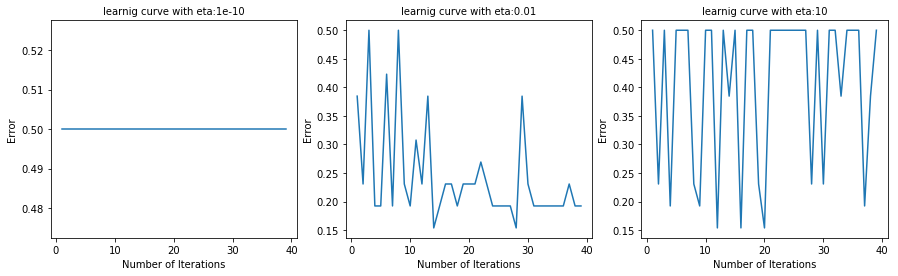

In [10]:
# Gradient Descent model for large dataset with 'log' loss
from sklearn.linear_model import SGDClassifier
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15,4)
for (i,e) in enumerate([0.0000000001, 0.01, 10]):
    result = []
    for iter_cnt in range(1, 40):
        clf = SGDClassifier(loss='log', penalty='l2', alpha=0.001, learning_rate='constant', eta0=e, verbose=0, random_state=7, n_iter=iter_cnt)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        result.append(1-np.sum(y_pred == y_test)*1.0/len(y_test))
        #print ('Test accuracy = ' + str(np.sum(y_pred == y_test)/len(y_test)))
    print('weight vector for eta:{}\n'.format(e), clf.coef_)
    ax[i].set_title('learnig curve with eta:{}'.format(e), fontsize=10)
    ax[i].set_xlabel('Number of Iterations', fontsize=10)
    ax[i].set_ylabel('Error', fontsize=10)
    ax[i].plot(range(1, 40), result)
plt.show()

### Perceptron

In [11]:
from sklearn.linear_model import Perceptron
clf = Perceptron(penalty='l1', alpha=0.01)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ('Test accuracy = {}'.format(accuracy_score(y_test, pred)))

Test accuracy = 0.5384615384615384


### SVM

In [12]:
from matplotlib.colors import ListedColormap

def plot_svm_hyperplane(ax, clf, y_train):
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    idx = clf.support_
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], c=y_train.values[idx], s=100,
                facecolors='none', zorder=10, cmap=cmap_bold)
    # get the separating hyperplane
    w = clf.coef_[0]   # from matrix to vector
    a = -w[0] / w[1]
    # \hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p
    h = 0.008
    x_min, x_max = X_train['Alcohol'].min() - 1, X_train['Alcohol'].max() + 1
    xx = np.arange(x_min, x_max, h)
    svm_sep = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    svm_sep_down = svm_sep + a * margin
    svm_sep_up = svm_sep - a * margin

    ax.plot(xx, svm_sep, 'k-')
    ax.plot(xx, svm_sep_down, 'k--')
    ax.plot(xx, svm_sep_up, 'k--')


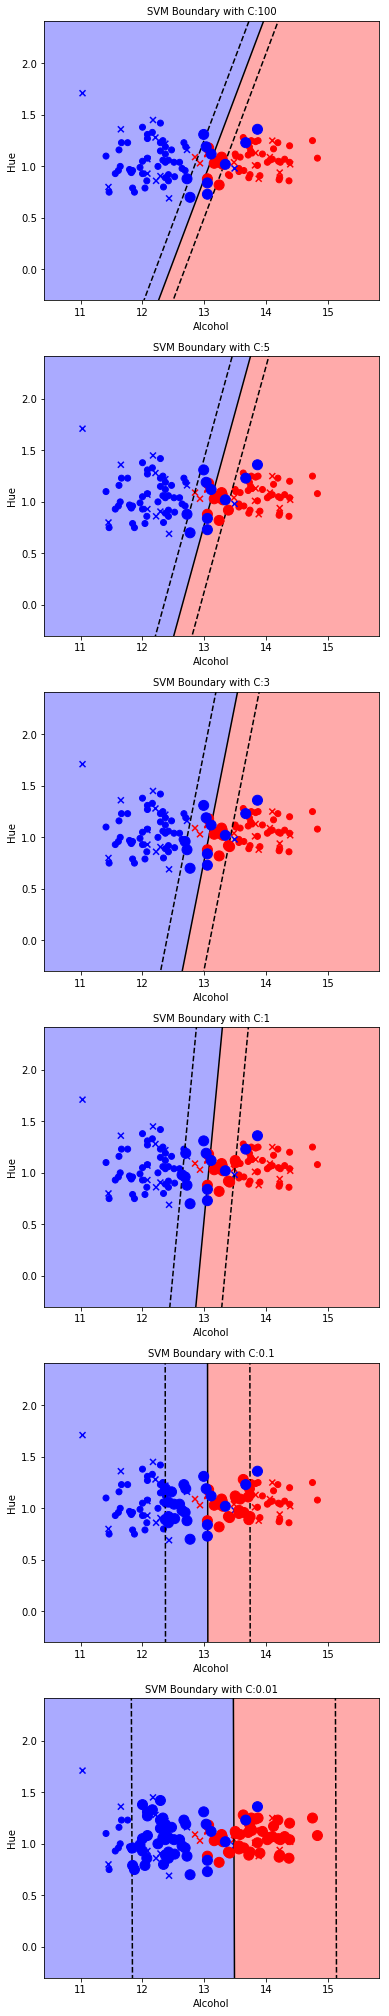

In [13]:
# notice that when C is very small, all samples looks similar, and boundary could shift towards class with smaller count
from sklearn.svm import SVC

fig, ax = plt.subplots(6, 1)
fig.set_size_inches(6, 36)

for i,C in enumerate([100, 5, 3, 1, 0.1, 0.01]):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_train)
    
    clf.fit(X_train[['Alcohol', 'Hue']], y_train)
    plot_boundary(ax[i], clf, 'SVM Boundary with C:{}'.format(C), 'Alcohol', 'Hue', X_train, X_test)
    plot_svm_hyperplane(ax[i], clf, y_train)

plt.show()